# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df= pd.read_csv('zillow_data.csv')

df.head()


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [2]:
df['StdPrice']= df.std(skipna=True, axis=1)

In [3]:
df['AvgHomePrice']= df.mean(skipna=True, axis=1)

In [4]:
df['ROI']= (df.iloc[:,-3]-df.iloc[:,7])/df.iloc[:,7]

In [5]:
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,StdPrice,AvgHomePrice,ROI
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1009600,1013300,1018700,1024400,1030700,1033800,1030600,203451.914731,734212.505259,2.083782
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,314100,315000,316600,318100,319600,321100,321800,37815.520226,217146.303049,0.365295
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,320400,320800,321200,321200,323000,326900,329900,43539.184162,259004.900313,0.567966
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1291500,1296600,1299000,1302700,1306400,1308500,1307000,249800.040104,961122.431376,1.623971
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,120300,120300,120300,120300,120500,121000,121500,19158.408568,101075.254307,0.571798


Split the data into different investment brackets:
1. 1M>
2. 750K<x<500K
3. 500K<

In [6]:
df_melted=pd.melt(df, id_vars=['RegionName', 'City', 'Metro','AvgHomePrice', 'ROI', 'StdPrice'], value_vars=df.iloc[:,7:-3], var_name='Date', value_name='Price')

In [7]:
current_price=df_melted[df_melted['Date']=='2018-04']

In [8]:
# df_melted_group= df_melted.groupby('RegionName').mean()
# df_melted[df_melted['City']=='Chicago']


In [9]:
# index_map_region= df[['RegionName','City', 'Metro']]
# pd.concat([index_map_region, df_melted_group], axis=1, join='outer', keys= 'RegionName')

In [10]:
top_10_Std= df[['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', 'AvgHomePrice', 'ROI', 'StdPrice']].sort_values('StdPrice', ascending= True).head(25)

In [11]:
top_10_Std.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,AvgHomePrice,ROI,StdPrice
13091,74754,38317,Bruceton,TN,NaN,Carroll,13092,41844.091252,0.340599,4097.546840
13895,75432,39813,Arlington,GA,NaN,Calhoun,13896,34857.148198,0.420339,4131.865394
7249,63502,14301,Niagara Falls,NY,Buffalo,Niagara,7250,33504.286240,0.246575,4299.998433
13181,74734,38255,Sharon,TN,Martin,Weakley,13182,43880.803178,0.216749,4365.054892
5389,90049,73521,Altus,OK,Altus,Jackson,5390,48864.316388,0.133475,4441.108417


In [12]:
top_10_ROI= df[['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', 'AvgHomePrice', 'ROI','StdPrice']].sort_values('ROI', ascending= False).head(25)

In [93]:
top_10_ROI.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,AvgHomePrice,ROI,StdPrice
117,62022,11211,New York,NY,New York,Kings,118,5.880672e+05,11.189940,397436.751042
1155,62033,11222,New York,NY,New York,Kings,1156,6.324746e+05,10.535523,448664.362986
475,62027,11216,New York,NY,New York,Kings,476,5.653764e+05,9.942505,387033.827390
191,60639,7302,Jersey City,NJ,New York,Hudson,192,5.891678e+05,9.403061,321308.640603
106,62026,11215,New York,NY,New York,Kings,107,1.061516e+06,8.941958,609481.339589


In [14]:
top_10_AvgHomePrice= df[['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', 'AvgHomePrice', 'ROI', 'StdPrice']].sort_values('AvgHomePrice', ascending= False).head(25)

In [15]:
top_10_AvgHomePrice.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,AvgHomePrice,ROI,StdPrice
272,61635,10021,New York,NY,New York,New York,273,1.258371e+07,NaN,3.727137e+06
20,61625,10011,New York,NY,New York,New York,21,7.584343e+06,NaN,2.825544e+06
508,61628,10014,New York,NY,New York,New York,509,6.694651e+06,NaN,2.239233e+06
21,61703,10128,New York,NY,New York,New York,22,5.015868e+06,1.009030,1.556229e+06
10237,97518,94027,Atherton,CA,San Francisco,San Mateo,10238,3.441001e+06,4.763653,1.338385e+06


Choose 11211 (Highest ROI and one of 4 King County NY zips in top 5 of ROI), 11930 (7th highest ROI, NY Suffolk County, Beach property), 80449 (Hartsel CO, 8th highest ROI), 20001 Washington DC (10th highest ROI), 94360 (Palo Alto, CA 21st ROI 18th on Avg Home Price)

Diversity in the locations of the houses, we have one west coast zip followed with one midwest and then three east coast cities. Statyed in the major cities due to it being where the greatest ROI has been seen over the past 25 years. Also, there is less risk in the cities due to the trend of millenials along with gen z migratiing to cities.  People will always need places to live and the properties will only increase in property value due to growing demand. m

# Step 2: Data Preprocessing

11211 King County NY 

11930 NY Suffolk County

80449 Hartsel CO 

20001 Washington DC

94360 Palo Alto, CA

In [16]:
top_5_zips= [11211, 11930, 80449, 20001, 94360]

In [76]:
list_of_zips= {}
for zipcode in top_5_zips:
    list_of_zips[zipcode] = pd.melt(df[df['RegionName']== zipcode], value_vars=df.iloc[:,7:-3], var_name='Date', value_name= 'Price')

In [77]:
list_of_zips.keys()

dict_keys([11211, 11930, 80449, 20001, 94360])

In [78]:
#come back to try and create for loop to do this for us

In [79]:
df_11211=pd.DataFrame(data= list_of_zips[11211])
df_11930=pd.DataFrame(data= list_of_zips[11930])
df_80449=pd.DataFrame(data= list_of_zips[80449])
df_20001=pd.DataFrame(data= list_of_zips[20001])
df_94360=pd.DataFrame(data= list_of_zips[94360])

In [86]:
df_11211['Date']= pd.to_datetime(df_11211.Date, format='%Y-%m')
df_11211.set_index('Date', inplace= True)

AttributeError: 'DataFrame' object has no attribute 'Date'

In [94]:
df_11211.head()

,Price
Date,
1996-04-01,133200.0
1996-05-01,132900.0
1996-06-01,132500.0
1996-07-01,132200.0
1996-08-01,131800.0


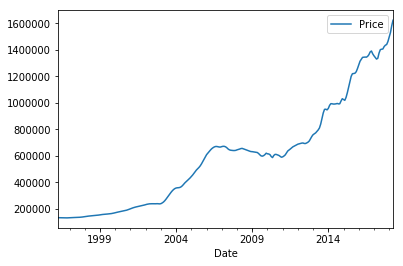

In [88]:
df_11211.plot()

In [47]:
# for zipcodes in list_of_zips:
#     df_prices_zips= pd.DataFrame(list_of_zips.values(), index= top_5_zips, columns)

In [95]:
def get_datetimes(df):
    df['Date']=pd.to_datetime(df.Date, format= '%Y-%m')
    df.set_index('Date', inplace=True)
    return df

# Step 3: EDA and Visualization

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

# Step 4: Reshape from Wide to Long Format

In [ ]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

# Step 5: ARIMA Modeling

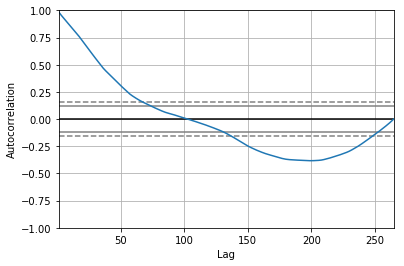

In [103]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_11211)

In [104]:
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
# fit model
model = ARIMA(df_11211, order=(50,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

/Users/gabrielblatstein/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/gabrielblatstein/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
/Users/gabrielblatstein/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


KeyboardInterrupt: 

# Step 6: Interpreting Results